<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/2_Beta___Cod/Beta_PCA/PCA_Cod_master_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO MASTER PCA _ BETA

## En escodigo encontraremos PCA aplicado a los datos mmc3

__ Versión 1.0 __

In [0]:
pip install mglearn

In [2]:
import gspread, sklearn, mglearn, time, pandas as pd, numpy as np, scipy as sc
import matplotlib.pyplot as plt
from oauth2client.client import GoogleCredentials
from google.colab import auth
from sklearn.decomposition import PCA
from IPython.display import clear_output

# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### ¡Aquí! Almaceno toda la informacion del GoogleSheet < mmc3 > en una sola variable diccionario < dcc >


In [3]:
# Creamos la variable diccionario
sh = gc.open('mmc3') # Abro GoogleSheet < mmc3 >
#···············································································
wk_lista = sh.worksheets()                                           # Variables
dcc , dcc_art = {} , {}
ndatos = 101              # numeros de frames en este caso de 0-100 = 101 datos
target_colum = ['% Gait Cycle', 
                'joven_Natural-',   'joven_Natural',   'joven_Natural+', 
                'joven_XS-',        'joven_XS',        'joven_XS+', 
                'joven_S-',         'joven_S',         'joven_S+', 
                'joven_M-',         'joven_M',         'joven_M+', 
                'joven_L-',         'joven_L',         'joven_L+', 
                'joven_Toe-',       'joven_Toe',       'joven_Toe+', 
                'joven_Heel-',      'joven_Heel',      'joven_Heel+', 
                'joven_Ascending-', 'joven_Ascending', 'joven_Ascending+', 
                'joven_Descending-','joven_Descending','joven_Descending+',
                'viejo_Natural-',   'viejo_Natural',   'viejo_Natural+', 
                'viejo_XS-',        'viejo_XS',        'viejo_XS+', 
                'viejo_S-',         'viejo_S',         'viejo_S+', 
                'viejo_M-',         'viejo_M',         'viejo_M+', 
                'viejo_L-',         'viejo_L',         'viejo_L+', 
                'viejo_Toe-',       'viejo_Toe',       'viejo_Toe+', 
                'viejo_Heel-',      'viejo_Heel',      'viejo_Heel+', 
                'viejo_Ascending-', 'viejo_Ascending', 'viejo_Ascending+', 
                'viejo_Descending-','viejo_Descending','viejo_Descending+']
#···············································································
for i in range(1,5):                           # Nombre de las pestañas del mmc3
  wk = sh.worksheet(wk_lista[i].title)  
  rw = np.array(wk.get_all_values())
  k  = ""
  dcc[str(wk_lista[i].title)] = {}
  _f1 = 1                   # fila de inicio por articulacion
  _f2 = 102                 # fila final de articulacion 
  iii = 0
  dcc_art = {}
  for ii in range(1,rw[:,0].shape[0]):  # Nombre de las articulaciones del sheet
    j = str(rw[ii,0]) # nombre de la articulacion
    if str(k) == str(j): # cambio de nombre
      j = j
    else:
      if iii > 0:
        _f1 = (101 * iii) + 1                  # fila de inicio por articulacion
        _f2 = _f1 + 101                             # fila final de articulacion 
      tabla = pd.DataFrame(rw[_f1:_f2,1::])
      tabla.columns = target_colum
      dcc_art[str(j)] = tabla
      dcc[str(wk_lista[i].title)] = dcc_art
      iii = iii + 1
    k = j 
pd.DataFrame(dcc)

,Joint Rotations,Ground Reaction Forces,Joint Moments,Joint Power
Pelvic Ant/Posterior Tilt,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Pelvic Up/Down Obliquity,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Pelvic Int/External Rotation,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Ad/Abduction,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Hip Int/External Rotation,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Knee Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Ankle Dorsi/Plantarflexion,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,% Gait Cycle joven_Natural- ... viejo_Des...,NaN
Thigh Flex/Extension,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN
Thigh Ad/Abduction,% Gait Cycle joven_Natural- ... viejo_Des...,NaN,NaN,NaN


## Función de realizar numeros aleatorios con una media y una desviacion estandar especifica


In [0]:
# PROCESO DE GENERAR NUMEROS ALEATORIOS CON PROMEDIO Y DESVIACION ESTANDAR 
# DESEADOS
#···············································································
num_samples     = 20     # Numero de numeros aleatorios a generar
desired_mean    = -2.8   # promedio de numeros aleatorios
desired_std_dev = 8.9    # Desviacion estandar a numeros aleatorios a generar
#···············································································
# Funcion de variables aleatorias con media y desviacion estandar
def var_alea (num_samples,desired_mean,desired_std_dev):
  samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)
  actual_mean = np.mean(samples)
  actual_std = np.std(samples)
  #print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".
  #      format(actual_mean, actual_std))
  zero_mean_samples = samples - (actual_mean)
  zero_mean_mean = np.mean(zero_mean_samples)
  zero_mean_std = np.std(zero_mean_samples)
  #print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".
  #      format(zero_mean_mean, zero_mean_std))
  scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
  scaled_mean = np.mean(scaled_samples)
  scaled_std = np.std(scaled_samples)
  #print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".
  #      format(scaled_mean, scaled_std))
  final_samples = scaled_samples + desired_mean
  final_mean = np.mean(final_samples)
  final_std = np.std(final_samples)
  #print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".
  #      format(final_mean, final_std))
  #print(final_samples)
  return(final_samples)

### ¡Aquí! vuelvo una tabla en 20 tablas que almacena las variables tanto de jovenes como las de viejos de los targets < "Natural","XS","S","M","L","Toe","Heel","Ascending","Descending" > con media y desviacion dada:

#### 1) la media es el valor medio de cada target
#### 2) la desviacion estandar es la suma de los valores absolutos de la desviacion estandar positima mas la negativa.

#### Nota····································································
#### solo salieron 25 lineas de codigo XD solo que para que se vea mas bonito consume mas lineas 

\\(·w·)/


In [0]:
#···············································································
# Selecciona la pestaña y articulacion
_sheet = 'Joint Rotations'
_artic = 'Pelvic Ant/Posterior Tilt'
#···············································································
# Variables diccionario de las tablas de 20 personas para jovenes y adultas
per = [""   ,"p1" ,"p2" ,"p3" ,"p4" ,"p5" ,"p6" ,"p7" ,"p8" ,"p9" ,"p10",
       "p11","p12","p13","p14","p15","p16","p17","p18","p19","p20"]
personas= {per[1]:[] ,per[2]:[] ,per[3]:[] ,per[4]:[] ,per[5] :[],
           per[6]:[] ,per[7]:[] ,per[8]:[] ,per[9]:[] ,per[10]:[],
           per[11]:[],per[12]:[],per[13]:[],per[14]:[],per[15]:[],
           per[16]:[],per[17]:[],per[18]:[],per[19]:[],per[20]:[]}
target_colum_ = ['% Gait Cycle','joven_Natural','joven_XS',
                 'joven_S','joven_M','joven_L','joven_Toe','joven_Heel', 
                 'joven_Ascending','joven_Descending','viejo_Natural',
                 'viejo_XS','viejo_S','viejo_M','viejo_L','viejo_Toe',
                 'viejo_Heel','viejo_Ascending','viejo_Descending']
for i in range(1,21):
  personas[per[i]] = pd.DataFrame(np.zeros((101,19)))
  personas[per[i]].columns = target_colum_
#···············································································
j_v = ["joven","viejo"]                # Lleno las distinatas tablas de personas
tag = ["Natural","XS","S","M","L","Toe","Heel","Ascending","Descending"]
# Armar el tag
for _j_v in j_v:
  for _tag in tag:
    vari = _j_v+"_"+_tag
    for i in range(dcc[_sheet ][_artic][vari].shape[0]):
      mean = dcc[_sheet ][_artic][vari][i]
      _mas = dcc[_sheet ][_artic][vari+"+"][i]
      _men = dcc[_sheet ][_artic][vari+"-"][i]
      DE   = abs(float(_mas))+abs(float(_men))
      NP   = pd.DataFrame(per).shape[0]-1                   # numero de personas
      num_gener = var_alea(NP,float(mean),DE)    # genero los numeros aleatorios
      # Comprovamos valores demedia y desviacion estandar
      media = np.mean(num_gener)
      DEE = np.std(num_gener)
      for _per in range(1,pd.DataFrame(per).shape[0]):
        personas[per[_per]][vari][i] = num_gener[_per-1]
#···············································································

In [6]:
personas

{'p1':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descending
 0             0.0      -5.894441  ...         1.457551         -2.466087
 1             0.0     -19.319776  ...        45.040182         10.359351
 2             0.0       3.826246  ...        -9.913617         21.057941
 3             0.0       7.002904  ...       -17.011242        -17.297441
 4             0.0       4.511717  ...       -16.143968        -14.804374
 ..            ...            ...  ...              ...               ...
 96            0.0      -3.506217  ...         0.113369         -2.142867
 97            0.0     -21.638731  ...        -2.831639         10.908550
 98            0.0      10.486194  ...        -4.110333        -11.526813
 99            0.0     -10.517669  ...        -7.244869          0.613871
 100           0.0      13.064092  ...       -53.075306         -6.578577
 
 [101 rows x 19 columns],
 'p10':      % Gait Cycle  joven_Natural  ...  viejo_Ascending  viejo_Descendi

  ### Guardamos la info en un Google Sheet de las diferentes personas de las pruebas

In [0]:
__i = False
if __i:
  # Creamos un documento Google sheet para poner la informacion de las 20 personas
  # OJO! Solo correr una vez
  gc.create("mmc3_personas")
  sh2 = gc.open('mmc3_personas')
  for i in range(1,21):
    sh2.add_worksheet(title=per[i],rows='110',cols='25')
  sh2.add_worksheet(title='MMC3',rows='1450',cols='60')

In [0]:
if __i:
  # Examina información de la persona a su target
  personas[per[1]][target_colum_[1]][0]

In [0]:
if __i:
  wks    = sh2.worksheet(per[1])
  wks.update_acell('A1',"beta")

In [0]:
if __i:
  abc = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R',
        'S','T','U','V','W','X','Y','Z',
        'AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN',
        'AO','AP','AQ','AR','AS','AT','AU','AV','AW','AX','AY','AZ',
        'BA','BB','BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN',
        'BO','BP','BQ','BR','BS','BT','BU','BV','BW','BX','BY','BZ']
  #···············································································
  # en el Google sheet mmc3_personas
  # Actualizo los targets de columnas en Google sheet por cada pagina de personas
  for i in range(1,pd.DataFrame(per).shape[0]):
    wks    = sh2.worksheet(per[i])
    for j in range(pd.DataFrame(target_colum_).shape[0]):
        wks.update_acell(abc[j]+'1',target_colum_[j])
  # Actualizo los targets del sheet "MMC3" con los mismos target de columnas que
  # el mmc3
  wks    = sh2.worksheet("MMC3")
  for i in range(pd.DataFrame(target_colum).shape[0]):
    #print("======== "+str(i))
    #print(target_colum[i])
    #print(abc[i])
    wks.update_acell(abc[i]+'1',target_colum[i])
  #···············································································
  # Lleno todas las tablas del Google sheet mmc3_personas



## MODIFICAR LOS PCA POR QUE SE CAMBIO EL DATASET

In [0]:
# Filas velocidades de personas %%%%%% profesor %%%%%%
# Columnas Articulaciones 0 -100 %  < % Gait Cycle' > 
#                                   < Pelvic Ant/Posterior Tilt >
aa  = bb  = np.zeros((0,101))
for i in range(1,pd.DataFrame(per).shape[0]):
  a   = np.array(pd.DataFrame(np.array(personas[per[i]].
                                       iloc[:,1 :10])).T) # joven
  b   = np.array(pd.DataFrame(np.array(personas[per[i]].
                                       iloc[:,10:19])).T) # viejo
  aa  = np.concatenate((aa,a),axis=0) # Concateno jovenes
  bb  = np.concatenate((bb,b),axis=0) # Concateno viejos
  X   = np.concatenate((aa,bb), axis=0)
# Y
Y = []
for i in range(aa.shape[0]): # jovenes
  Y.append(int(0))
for i in range(bb.shape[0]): # viejos
  Y.append(int(1))
Y = np.array(Y)
Y = Y[:, np.newaxis]

In [12]:
np.array(range(101))[:, np.newaxis].shape

(101, 1)

In [0]:
__i = False
if __i:
  # Filas velocidades de personas %%%%%% BETA %%%%%%
  # Columnas Articulaciones 0 -100 %  < % Gait Cycle' > 
  #                                   < Pelvic Ant/Posterior Tilt >
  aa  = bb  = np.zeros((0,10))
  for i in range(1,pd.DataFrame(per).shape[0]):
    a = np.concatenate((np.array(range(101))[:, np.newaxis],
                        np.array(personas[per[i]].iloc[:,1  :10])),axis=1) # joven
    b = np.concatenate((np.array(range(101))[:, np.newaxis],
                        np.array(personas[per[i]].iloc[:,10 :19])),axis=1) # viejo
    aa  = np.concatenate((aa,a),axis=0) # Concateno jovenes
    bb  = np.concatenate((bb,b),axis=0) # Concateno viejos
    X   = np.concatenate((aa,bb), axis=0)
  # Y
  Y = []
  for i in range(aa.shape[0]): # jovenes
    Y.append(int(0))
  for i in range(bb.shape[0]): # viejos
    Y.append(int(1))
  Y = np.array(Y)
  Y = Y[:, np.newaxis]

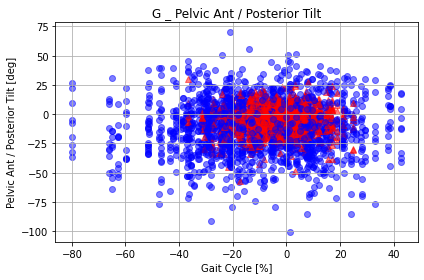

In [14]:
for i in range(1,10):
  plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, i], color='red',  marker='^', alpha=0.5) # jovenes
  plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, i], color='blue', marker='o', alpha=0.5) # viejos
  
plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA
#
pca=PCA(n_components=2)
pca.fit(X)
#
transformada=pca.transform(X)

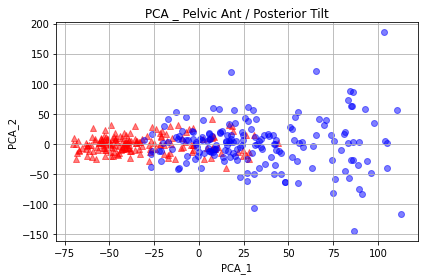

In [16]:
plt.scatter(transformada[Y[:,0] == 0,0],transformada[Y[:,0] == 0,1], color='red',  marker='^', alpha=0.5) 
plt.scatter(transformada[Y[:,0] == 1,0],transformada[Y[:,0] == 1,1], color='blue', marker='o', alpha=0.5) 
plt.grid(True)
plt.title("PCA _ Pelvic Ant / Posterior Tilt")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

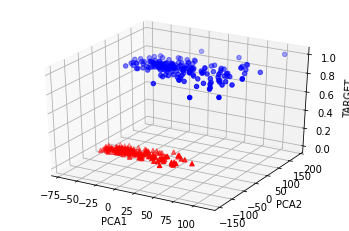

In [17]:
from mpl_toolkits.mplot3d import Axes3D
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
xs = transformada[Y[:,0] == 0,0]
ys = transformada[Y[:,0] == 0,1]
zs = Y[Y[:,0] == 0,0]
ax.scatter(xs, ys, zs, c='r', marker='^')
#
xs = transformada[Y[:,0] == 1,0]
ys = transformada[Y[:,0] == 1,1]
zs = Y[Y[:,0] == 1,0]
ax.scatter(xs, ys, zs, c='b', marker='o')
#
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('TARGET')
plt.show()